In [1]:
import copy
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

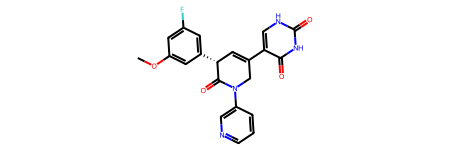

In [2]:
mol13 = Chem.MolFromSmiles("O=c1c(C2=C[C@H](C(=O)N(C2)c2cnccc2)c2cc(F)cc(OC)c2)c[nH]c(=O)[nH]1")
mols = [mol13] #[mol11, mol12, mol13]
for mol in mols:
    display(mol)
#display(mols[0])

Trying stuff with BRICS

In [11]:
#for mol in mols:
frags = list(Chem.BRICS.BRICSDecompose(mol13, minFragmentSize=1, keepNonLeafNodes=True, returnMols=False))
##if returnMols = False
molsxx = [Chem.MolFromSmiles(x) for x in frags]

smi = [Chem.MolToSmiles(x,True) for x in molsxx]
sorted(smi)

## removing dummy atoms from molecules
du = Chem.MolFromSmiles('*')
molh = [Chem.AllChem.ReplaceSubstructs(x,du,Chem.MolFromSmiles('[H]'), True)[0] for x in molsxx]
display(molh)
smih = [Chem.MolToSmiles(x) for x in molh]
sorted(smih)
#Draw.MolsToGridImage(molh, molsPerRow=4, subImgSize=(200, 200))

#sdfFile2d = open('junk/junk.sdf', 'a')

x = 0
for smi in sorted(smih):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    # save 2D sdf file
    sdfFile2d = open('junk/tmp_' +str(x) + '.sdf', 'w')
    writer = Chem.SDWriter(sdfFile2d)
    writer.write(mol)
    x += 1

sdfFile3d = open('junk/junk_brics.sdf', 'a')
for smi in sorted(smih):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    #save 3D sdf file
    confIds = Chem.AllChem.EmbedMultipleConfs(mol, 1)
    for confId in range(1):
        Chem.AllChem.UFFOptimizeMolecule(mol, confId=confId)
        writer = Chem.SDWriter(sdfFile3d)
        writer.write(mol, confId=confId)  

[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors
[11:49:48] WARNING: not removing hydrogen atom without neighbors


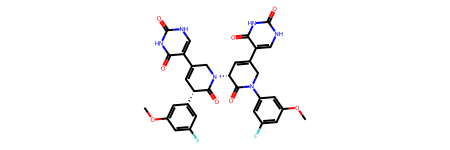

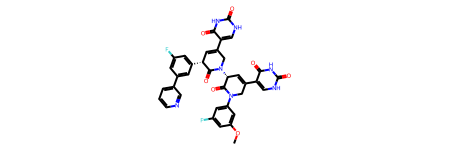

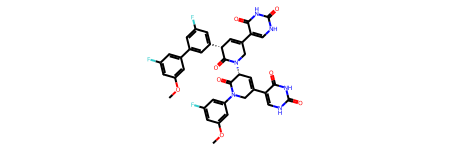

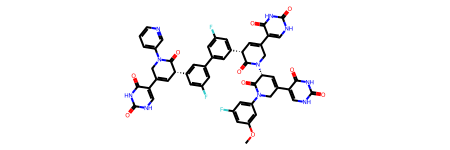

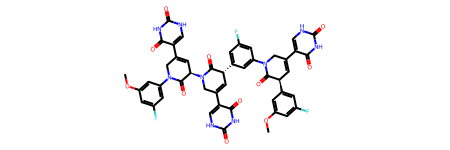

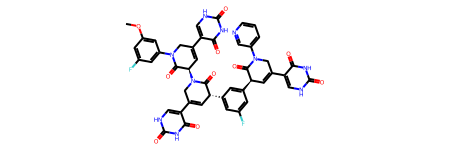

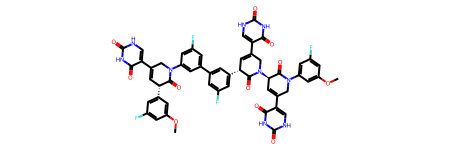

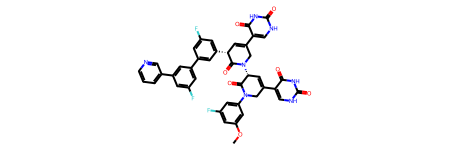

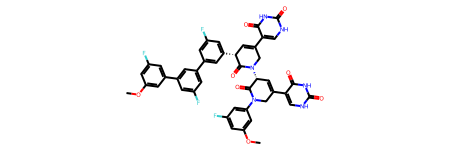

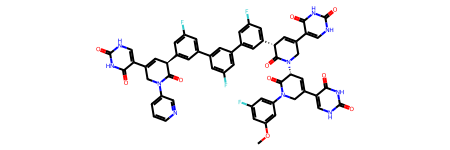

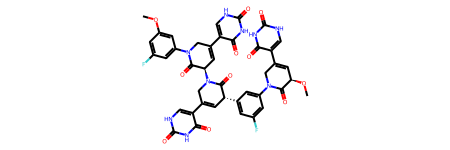

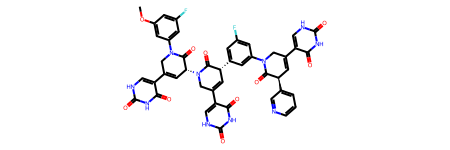

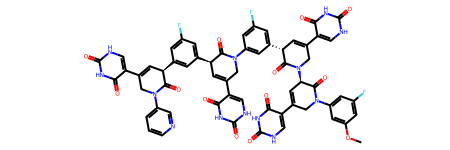

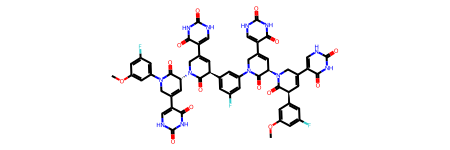

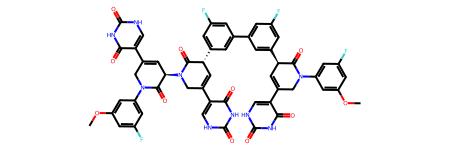

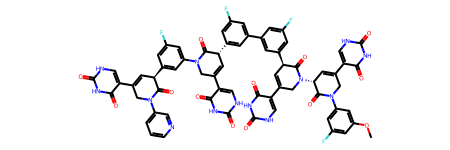

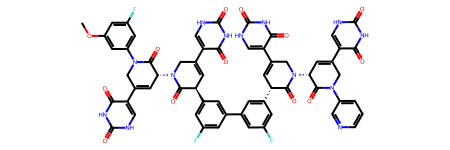

In [12]:
import random
build = BRICS.BRICSBuild(molsxx)
random.seed(90)
prods = [next(build) for x in range(17)]
for mol in prods:
    display(mol)
#prods
#Draw.MolsToGridImage(prods, molsPerRow=4, subImgSize=(200, 200))

In [16]:
import sys
import os

import sascorer
sa_scores = [sascorer.calculateScore(x) for x in prods]
sa_scores

NameError: name 'RDConfig' is not defined